# Machine Learning Project

Using dataset from Kaggle.com labeled "Logistic Regression to predict Heart Disease"

#### Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

#### Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

## Introduction of dataset

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('framingham.csv')

print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

## Visualization of dataset
Following is a visualization of the dataset
### Dataset Overview

In [29]:
print(f"Dataset Shape: {df.shape}")

print(f"Number of Instances: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\nFirst few rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (4238, 16)
Number of Instances: 4238
Number of Features: 16

First few rows:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  13

### Target Variable Analysis

In [30]:
target_counts = df['TenYearCHD'].value_counts()

print(target_counts)

print(f"Class Distribution: {target_counts[0]} (Class 0) vs {target_counts[1]} (Class 1)")
print(f"Percentage: {target_counts[0]/len(df)*100:.2f}% vs {target_counts[1]/len(df)*100:.2f}%")


TenYearCHD
0    3594
1     644
Name: count, dtype: int64
Class Distribution: 3594 (Class 0) vs 644 (Class 1)
Percentage: 84.80% vs 15.20%


### Visualizations


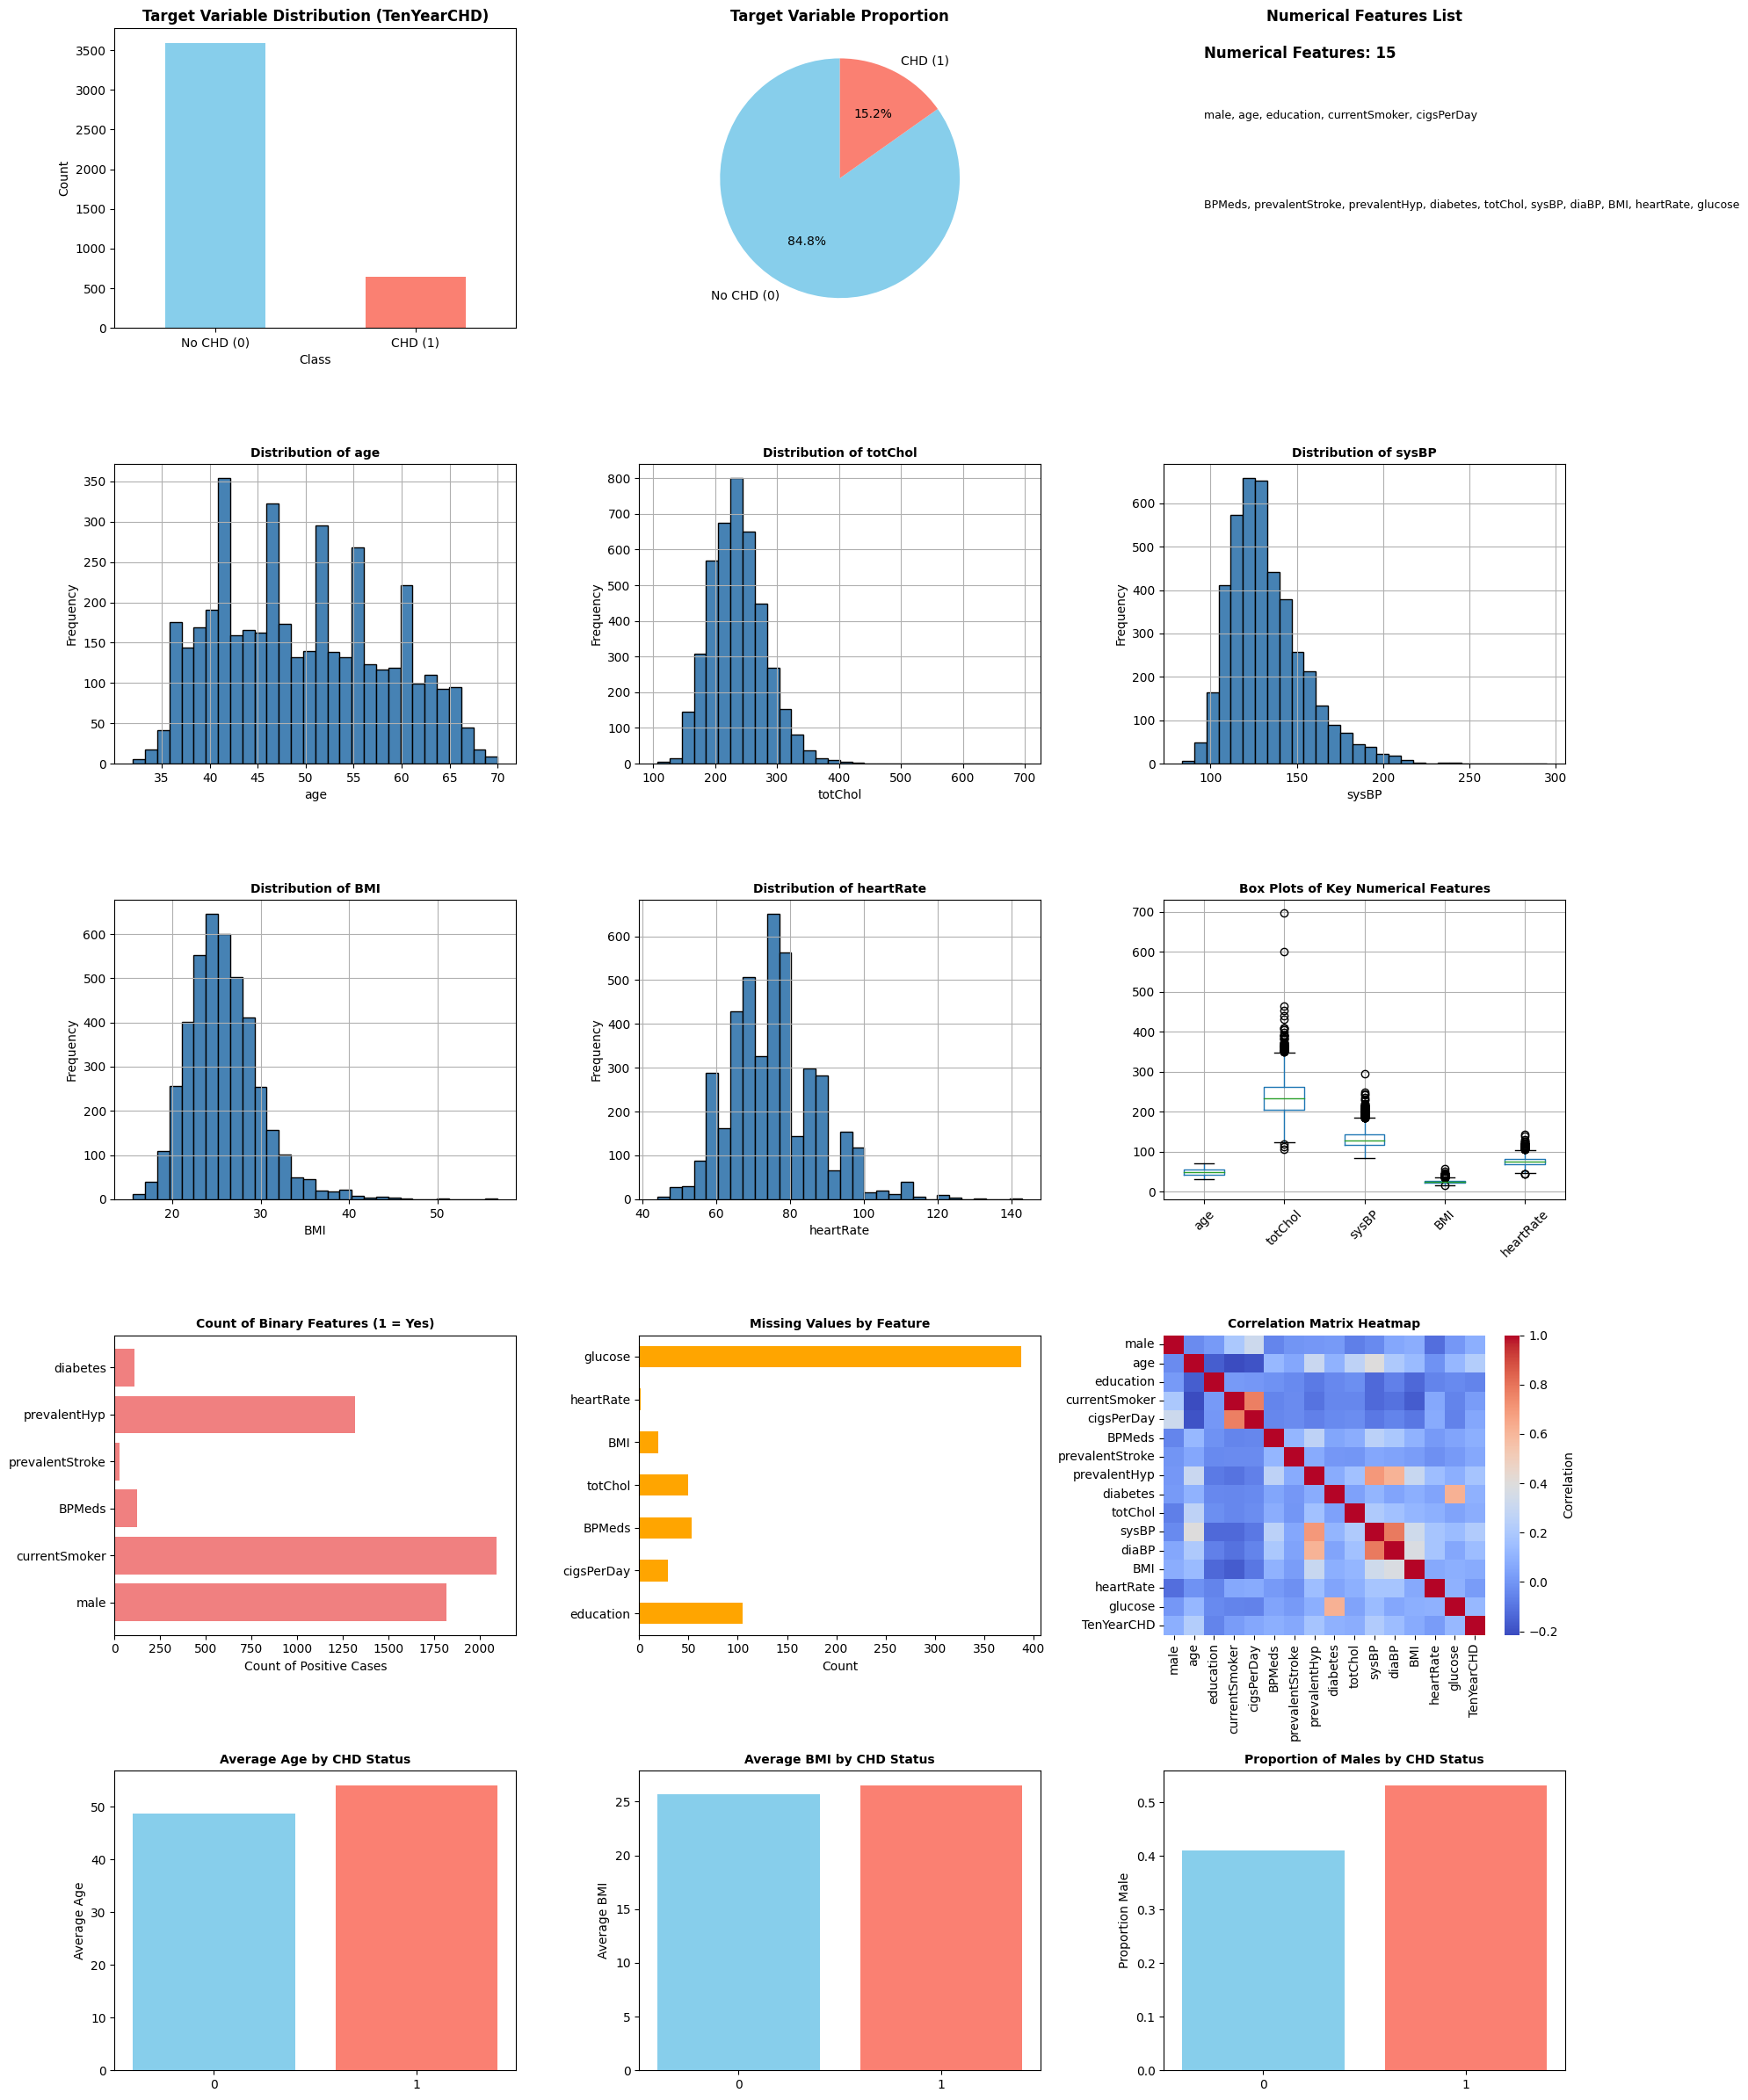

In [31]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 3.1 Target Variable Distribution
ax1 = plt.subplot(5, 3, 1)
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Target Variable Distribution (TenYearCHD)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No CHD (0)', 'CHD (1)'], rotation=0)

# 3.2 Target Variable Pie Chart - FIXED using .values to convert pandas Series
ax2 = plt.subplot(5, 3, 2)
ax2.pie(target_counts.values, labels=['No CHD (0)', 'CHD (1)'], autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], startangle=90)
ax2.set_title('Target Variable Proportion', fontsize=12, fontweight='bold')

# 3.3 Numerical Features Overview - Distributions
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'TenYearCHD' in numerical_cols:
    numerical_cols.remove('TenYearCHD')  # Remove target variable

ax3 = plt.subplot(5, 3, 3)
ax3.axis('off')
ax3.text(0.1, 0.9, f'Numerical Features: {len(numerical_cols)}', fontsize=12, fontweight='bold')
ax3.text(0.1, 0.7, ', '.join(numerical_cols[:5]), fontsize=9, wrap=True)
if len(numerical_cols) > 5:
    ax3.text(0.1, 0.4, ', '.join(numerical_cols[5:]), fontsize=9, wrap=True)
ax3.set_title('Numerical Features List', fontsize=12, fontweight='bold')

# 3.4-3.8 Distributions of Key Numerical Features
key_numerical = ['age', 'totChol', 'sysBP', 'BMI', 'heartRate']
for idx, col in enumerate(key_numerical):
    if col in df.columns:
        ax = plt.subplot(5, 3, 4 + idx)
        df[col].hist(bins=30, ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# 3.9 Box plots for numerical features (to show outliers)
ax9 = plt.subplot(5, 3, 9)
# Filter to only columns that exist
existing_numerical = [col for col in key_numerical if col in df.columns]
if existing_numerical:
    df[existing_numerical].boxplot(ax=ax9)
    ax9.set_title('Box Plots of Key Numerical Features', fontsize=10, fontweight='bold')
    ax9.tick_params(axis='x', rotation=45)

# 3.10 Categorical/Binary Features Distribution
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
# Filter to only columns that exist
existing_categorical = [col for col in categorical_cols if col in df.columns]

ax10 = plt.subplot(5, 3, 10)
if existing_categorical:
    categorical_data = [df[col].sum() for col in existing_categorical]
    ax10.barh(existing_categorical, categorical_data, color='lightcoral')
    ax10.set_title('Count of Binary Features (1 = Yes)', fontsize=10, fontweight='bold')
    ax10.set_xlabel('Count of Positive Cases')
else:
    ax10.text(0.5, 0.5, 'No categorical features', ha='center', va='center')

# 3.11 Missing Values Visualization
ax11 = plt.subplot(5, 3, 11)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='barh', ax=ax11, color='orange')
    ax11.set_title('Missing Values by Feature', fontsize=10, fontweight='bold')
    ax11.set_xlabel('Count')
else:
    ax11.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=12)
    ax11.set_title('Missing Values Analysis', fontsize=10, fontweight='bold')

# 3.12 Correlation Heatmap
ax12 = plt.subplot(5, 3, 12)
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax12, cbar_kws={'label': 'Correlation'})
ax12.set_title('Correlation Matrix Heatmap', fontsize=10, fontweight='bold')

# 3.13-3.14 Target vs Key Features
ax13 = plt.subplot(5, 3, 13)
if 'age' in df.columns and 'TenYearCHD' in df.columns:
    age_by_chd = df.groupby('TenYearCHD')['age'].mean()
    ax13.bar(range(len(age_by_chd)), age_by_chd.values, color=['skyblue', 'salmon'])
    ax13.set_title('Average Age by CHD Status', fontsize=10, fontweight='bold')
    ax13.set_ylabel('Average Age')
    ax13.set_xticks(range(len(age_by_chd)))
    ax13.set_xticklabels(age_by_chd.index, rotation=0)

ax14 = plt.subplot(5, 3, 14)
if 'BMI' in df.columns and 'TenYearCHD' in df.columns:
    bmi_by_chd = df.groupby('TenYearCHD')['BMI'].mean()
    ax14.bar(range(len(bmi_by_chd)), bmi_by_chd.values, color=['skyblue', 'salmon'])
    ax14.set_title('Average BMI by CHD Status', fontsize=10, fontweight='bold')
    ax14.set_ylabel('Average BMI')
    ax14.set_xticks(range(len(bmi_by_chd)))
    ax14.set_xticklabels(bmi_by_chd.index, rotation=0)

ax15 = plt.subplot(5, 3, 15)
if 'male' in df.columns and 'TenYearCHD' in df.columns:
    male_by_chd = df.groupby('TenYearCHD')['male'].mean()
    ax15.bar(range(len(male_by_chd)), male_by_chd.values, color=['skyblue', 'salmon'])
    ax15.set_title('Proportion of Males by CHD Status', fontsize=10, fontweight='bold')
    ax15.set_ylabel('Proportion Male')
    ax15.set_xticks(range(len(male_by_chd)))
    ax15.set_xticklabels(male_by_chd.index, rotation=0)

plt.tight_layout()
plt.savefig('dataset_visualization_complete.png', dpi=300, bbox_inches='tight')
plt.show()


### Additional analysis

In [35]:
# Identify numerical, categorical, ordinal
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

print(f"\nNumerical Features ({len(numerical_features)}):")
for feat in numerical_features:
    print(f"  - {feat}: range [{df[feat].min():.2f}, {df[feat].max():.2f}]")

print(f"\nBinary/Categorical Features ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"  - {feat}: {df[feat].unique()}")

# Check for ordinal features
print("\nPotential Ordinal Features:")
print("  - education: 1-4")


Numerical Features (10):
  - age: range [32.00, 70.00]
  - education: range [1.00, 4.00]
  - cigsPerDay: range [0.00, 70.00]
  - totChol: range [107.00, 696.00]
  - sysBP: range [83.50, 295.00]
  - diaBP: range [48.00, 142.50]
  - BMI: range [15.54, 56.80]
  - heartRate: range [44.00, 143.00]
  - glucose: range [40.00, 394.00]
  - TenYearCHD: range [0.00, 1.00]

Binary/Categorical Features (6):
  - male: [1, 0]
Categories (2, int64): [0, 1]
  - currentSmoker: [0, 1]
Categories (2, int64): [0, 1]
  - BPMeds: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
  - prevalentStroke: [0, 1]
Categories (2, int64): [0, 1]
  - prevalentHyp: [0, 1]
Categories (2, int64): [0, 1]
  - diabetes: [0, 1]
Categories (2, int64): [0, 1]

Potential Ordinal Features:
  - education: 1-4


#### Edits: 
##### Edit to binary / categorical datatypes:
- Gender: Male/Female
- Current Smoker: Yes/No
- BP Meds: Yes/No
- Prevalent Stroke: Yes/No
- Prevalent Hyp: Yes/No
- Diabetes: Yes/No


In [33]:
binary_columns = {
    'male': 'Male/Female',
    'currentSmoker': 'Yes/No',
    'BPMeds': 'Yes/No',
    'prevalentStroke': 'Yes/No',
    'prevalentHyp': 'Yes/No',
    'diabetes': 'Yes/No'
}

# Method 1: Convert to category datatype (recommended for machine learning)
for col in binary_columns.keys():
    if col in df.columns:
        df[col] = df[col].astype('category')


# Check the datatypes
print("Data types after conversion:")
print(df.dtypes)
print("\n")

# Display first few rows to verify
print("First few rows:")
print(df.head())

# Save the converted dataset
df.to_csv('framingham.csv', index=False)

Data types after conversion:
male               category
age                   int64
education           float64
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD            int64
dtype: object


First few rows:
  male  age  education currentSmoker  cigsPerDay BPMeds prevalentStroke  \
0    1   39        4.0             0         0.0    0.0               0   
1    0   46        2.0             0         0.0    0.0               0   
2    1   48        1.0             1        20.0    0.0               0   
3    0   61        3.0             1        30.0    0.0               0   
4    0   46        3.0             1        23.0    0.0               0   

  prevalentHyp diabetes  totChol  sysBP 

### Data Quality Report

In [34]:
print(f"Total Instances: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"Complete Cases (no missing): {len(df.dropna())}")
print(f"Incomplete Cases: {len(df) - len(df.dropna())}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Total Instances: 4238
Total Features: 16
Complete Cases (no missing): 3656
Incomplete Cases: 582
Memory Usage: 0.35 MB
